# Introduction
<hr style="border:2px solid black"> </hr>


**What?** Confidence interval via bootstrap



# Import modules
<hr style="border:2px solid black"> </hr>

In [1]:
import numpy
from pandas import read_csv
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

# Theory recalls

## Why bootstrap?


- A robust way to calculate confidence intervals for machine learning algorithms is to use the bootstrap. 
- This is a general technique for estimating statistics that can be used to calculate empirical confidence intervals, regardless of the distribution (e.g. also non-Gaussian)



## Calculate a population statistics


- The first step is to use the bootstrap procedure to resample the original data a number of times and calculate the statistic of interest. 
- The dataset is sampled with replacement. This means that each time an item is selected from the original dataset, it is not removed, allowing that item to possibly be selected again for the sample. 
- The number of bootstrap repeats defines the variance of the estimate, and more is better, often hundreds or thousands.
- The pseudo code would look like this:



In [2]:
"""
statistics = []
for i in bootstraps:
    sample = select_sample_with_replacement(data)
    stat = calculate_statistic(sample)
    statistics.append(stat)
"""

'\nstatistics = []\nfor i in bootstraps:\n    sample = select_sample_with_replacement(data)\n    stat = calculate_statistic(sample)\n    statistics.append(stat)\n'

## Calculate confidence interval


- Now that we have a population of the statistics of interest, we can calculate the confidence intervals.
- This is done by first ordering the statistics, then selecting values at the chosen percentile for the confidence interval. The chosen percentile in this case is called alpha.
- For example, if we were interested in a confidence interval of 95%, then alpha would be 0.95 and we would select  the value at the 2.5% percentile as the lower bound and the 97.5% percentile as the upper bound on the statistic of  interest. 2.5% comes from 1-0.95/2=5/2=2.5%; the division by two comes from the need to require both upper and  lower interval.
- For example, if we calculated 1,000 statistics from 1,000 bootstrap samples, then the lower bound would be the 25th value and the upper bound would be the 97.5th value, assuming the list of statistics was ORDERED.
- In this, we are calculating a non-parametric confidence interval that does not make any assumption about the  functional form of the distribution of the statistic. 
- This confidence interval is often called the empirical confidence interval.



In [3]:
"""
ordered = sort(statistics)
lower = percentile(ordered, (1-alpha)/2)
upper = percentile(ordered, alpha+((1-alpha)/2))
"""

'\nordered = sort(statistics)\nlower = percentile(ordered, (1-alpha)/2)\nupper = percentile(ordered, alpha+((1-alpha)/2))\n'

# Calculate Classification Accuracy Confidence Interval

In [4]:
# load dataset
data = read_csv('../DATASETS/pima-indians-diabetes.csv', header=None)
values = data.values


- Next, we will configure the bootstrap. 
- We will use 1,000 bootstrap iterations and select a sample that is 50% the size of the dataset.



In [5]:
# configure bootstrap
n_iterations = 1000
n_size = int(len(data) * 0.50)


- The sample will be selected with replacement using the resample() function from sklearn. 
- Any rows that were not included in the sample are retrieved and used as the test dataset. 
- Next, a decision tree classifier is fit on the sample and evaluated on the test set, a classification score calculated, and added to a list of scores collected  across all the bootstraps.



In [6]:
# run bootstrap
stats = list()
for i in range(n_iterations):
    # Prepare train and test sets
    train = resample(values, n_samples=n_size)
    test = numpy.array([x for x in values if x.tolist() not in train.tolist()])
    # Fit model on the TRAINING data
    model = DecisionTreeClassifier()
    model.fit(train[:,:-1], train[:,-1])
    # Evaluate model on the TEST data
    predictions = model.predict(test[:,:-1])
    score = accuracy_score(test[:,-1], predictions)
    print(score)
    stats.append(score)    

0.6702355460385439
0.6961206896551724
0.6919831223628692
0.6723768736616702
0.721627408993576
0.6792452830188679
0.7112068965517241
0.6974248927038627
0.673773987206823
0.7008547008547008
0.7558886509635975
0.7100840336134454
0.7194860813704497
0.6897321428571429
0.6787234042553192
0.7096774193548387
0.692144373673036
0.7014925373134329
0.6893617021276596
0.6883116883116883
0.7161290322580646
0.6515151515151515
0.7
0.6558441558441559
0.6651982378854625
0.6926315789473684
0.7157676348547718
0.7241379310344828
0.6857142857142857
0.6809421841541756
0.6845493562231759
0.6709129511677282
0.7024070021881839
0.6645161290322581
0.6404255319148936
0.6552462526766595
0.7012987012987013
0.6629955947136564
0.6855895196506551
0.6852248394004282
0.7010752688172043
0.6730769230769231
0.6404255319148936
0.7045951859956237
0.6557017543859649
0.7225806451612903
0.6804347826086956
0.6851441241685144
0.7002141327623126
0.7139737991266376
0.6916488222698073
0.6353711790393013
0.6971677559912854
0.704103671

0.6792452830188679
0.7017167381974249
0.6801705756929638
0.6991525423728814
0.6861471861471862
0.6873661670235546
0.6974248927038627
0.6921397379912664
0.6827731092436975
0.6807610993657506
0.6856540084388185
0.6822033898305084
0.6963906581740976
0.6875
0.7012987012987013
0.7130434782608696
0.6825053995680346
0.6858974358974359
0.6903225806451613
0.7266949152542372
0.6934782608695652
0.7006369426751592
0.6936170212765957
0.6987179487179487
0.6666666666666666
0.6937901498929336
0.6849015317286652
0.6866666666666666
0.6852248394004282
0.6588486140724946
0.658008658008658
0.6864406779661016
0.6914660831509847
0.6752688172043011
0.6997840172786177
0.6973684210526315
0.6963123644251626
0.703862660944206
0.6973684210526315
0.6596194503171248
0.6971677559912854
0.6572668112798264
0.7049891540130152
0.6651685393258427
0.670995670995671
0.6716417910447762
0.6781857451403888
0.6396588486140725
0.7098901098901099
0.67590618336887
0.6893617021276596
0.7093275488069414
0.7008733624454149
0.66105263

0.7021739130434783
0.7439293598233996
0.6637554585152838
0.7017167381974249
0.6872340425531915
0.7114967462039046
0.6735537190082644
0.7203389830508474
0.6541850220264317
0.6659707724425887
0.6836518046709129
0.6688172043010753
0.7010752688172043
0.6630669546436285
0.692144373673036
0.7052401746724891
0.6795698924731183
0.7015250544662309
0.6946236559139785
0.6434782608695652
0.673202614379085
0.6816239316239316
0.7
0.6798245614035088
0.7044967880085653
0.6812227074235808
0.6995708154506438
0.6888412017167382
0.6540084388185654
0.7443298969072165
0.6462882096069869
0.6316916488222698
0.6609442060085837
0.6799163179916318
0.6716101694915254
0.6694736842105263
0.6666666666666666
0.6958333333333333
0.7334754797441365
0.6781115879828327
0.702355460385439
0.6795698924731183
0.6574468085106383
0.6801705756929638
0.6841004184100419
0.6887417218543046
0.6638115631691649
0.6888412017167382
0.7123893805309734
0.6716738197424893
0.6853448275862069
0.6630669546436285
0.7109207708779444
0.724358974


- Once the scores are collected, a histogram is created to give an idea of the distribution of scores. 
- We would generally expect this distribution to be Gaussian, perhaps with a skew with a symmetrical variance around the mean.
- Please note that the bootstrapping procedure works also for non-Gaussian method.
- Finally, we can calculate the empirical confidence intervals using the percentile() NumPy function. 
- A 95% confidence interval is used, so the values at the 2.5 and 97.5 percentiles are selected.



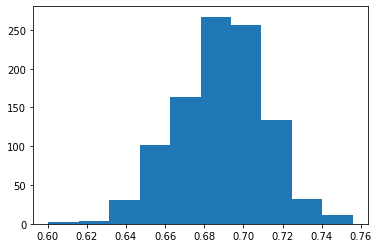

In [7]:
# plot scores
pyplot.hist(stats)
pyplot.show()

In [16]:
# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, numpy.percentile(stats, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, numpy.percentile(stats, p))
print('%.1f confidence interval with lower and upper percentile at %.3f and %.3f respectively' % (alpha*100, lower, upper))

95.0 confidence interval with lower and upper percentile at 0.643 and 0.728 respectively



- Finally, the confidence intervals are reported, showing that there is a 95% likelihood that the confidence interval 64.4% and 73.0% covers the true skill of the model. 
- This same method can be used to calculate confidence intervals of any other errors scores, such as root mean squared error for regression algorithms.



# References
<hr style="border:2px solid black"> </hr>


- https://machinelearningmastery.com/calculate-bootstrap-confidence-intervals-machine-learning-results-python
- https://machinelearningmastery.com/confidence-intervals-for-machine-learning/
    
